### Week 8: Text Visualisation
Student: Stephen Alger C16377163

Date: March 2021

---

### Task One: Input Speech & Process Data: 


In [76]:
#Install Necessary Modules:
library("tm") #text mining
library("SnowballC") #text stemming
library("wordcloud") #wordcloud
library("RColorBrewer") #colour palette

#Dependency Installation & Loading
install.packages("cowplot")
install.packages("viridis")
install.packages("tidyverse")

#Set Environment Plot Size:
options(repr.plot.width=8, repr.plot.height=8)

#Define my Own Theme                           
my_Theme <- theme(
    plot.title = element_text(face="bold",size=40),
    plot.subtitle = element_text(face="italic", size = 20),
    axis.title = element_text(face="bold",size=20),
    axis.text = element_text(size=20),
    plot.caption = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 14)
)


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp8UgGDA/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp8UgGDA/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp8UgGDA/downloaded_packages


In [77]:
#Input File Name
#Speech: Steve Jobs Stanford 2005 Commencement Speech
#Link to speech: https://www.researchgate.net/publication/301899412_Steve_Jobs_Speech
inputSpeech = "./data/SteveJobsSpeech.txt"
speechTranscript <- readLines(inputSpeech)

In [78]:
#Load File as Corpus
transcript <- Corpus(VectorSource(speechTranscript))

In [79]:
inspect(transcript)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 27

 [1] STEVE JOBS, JUNE 14 2005, STANFORD                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [2] I am

In [80]:
# Map 
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
transcript <- tm_map(transcript, toSpace, "—")
transcript <- tm_map(transcript, toSpace, "/")
transcript <- tm_map(transcript, toSpace, "@")
transcript <- tm_map(transcript, toSpace, "\\|")

Warning message in tm_map.SimpleCorpus(transcript, toSpace, "—"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, toSpace, "/"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, toSpace, "@"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, toSpace, "\\|"):
“transformation drops documents”


In [81]:
# Convert the text to lower case
transcript <- tm_map(transcript, content_transformer(tolower))

# Remove numbers
#transcript <- tm_map(transcript, removeNumbers)

# Remove english common stopwords
transcript <- tm_map(transcript, removeWords, stopwords("english"))

# Remove your own stop word
# specify your stopwords as a character vector
transcript <- tm_map(transcript, removeWords, c("blabla1", "blabla2")) 

# Remove punctuations
transcript <- tm_map(transcript, removePunctuation)

# Eliminate extra white spaces
transcript <- tm_map(transcript, stripWhitespace)

# Text stemming
#transcript <- tm_map(transcript, stemDocument)

Warning message in tm_map.SimpleCorpus(transcript, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, removeWords, c("blabla1", "blabla2")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(transcript, stripWhitespace):
“transformation drops documents”


In [82]:
# Inspect Remapped Speech:
inspect(transcript)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 27

 [1] steve jobs june 14 2005 stanford                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
 [2]  honoured today commencement one finest universities world never graduated college truth told closest ever gotten college graduation today want tell three stories life big deal just three stories                                                                                                                                                                             

In [83]:
dtm <- TermDocumentMatrix(transcript)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 20)

,word,freq
,<fct>,<dbl>
life,life,16
college,college,14
one,one,9
years,years,9
just,just,8
never,never,8
apple,apple,8
dropped,dropped,7
months,months,7


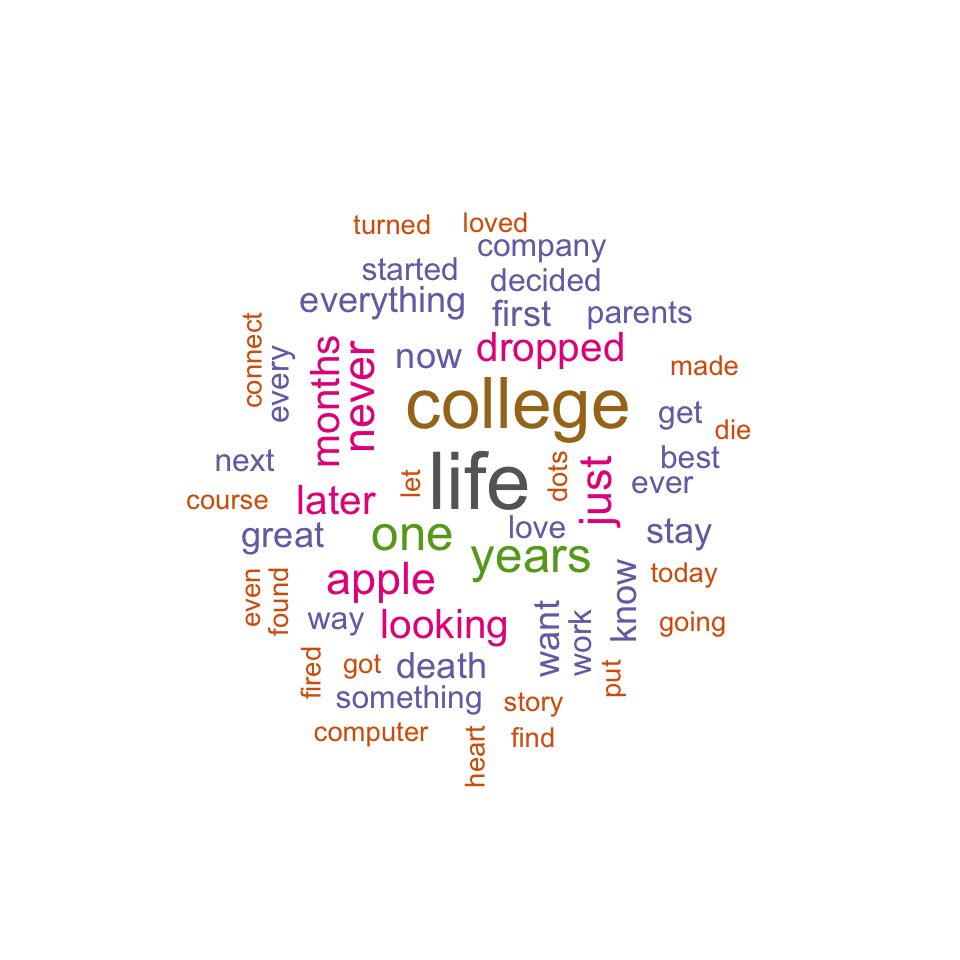

In [91]:
# Seed Cloud
set.seed(1234)

wordcloud(words = d$word, freq = d$freq, min.freq = 4,max.words=200, random.order=FALSE, rot.per=0.35, colors=brewer.pal(8, "Dark2"))

In [85]:
findFreqTerms(dtm, lowfreq = 4)

[1] "college"    "ever"       "just"       "life"       "never"     
 [6] "one"        "today"      "want"       "dots"       "first"     
[11] "story"      "dropped"    "months"     "course"     "decided"   
[16] "everything" "found"      "got"        "later"      "parents"   
[21] "put"        "started"    "best"       "going"      "looking"   
[26] "made"       "work"       "years"      "every"      "get"       
[31] "let"        "loved"      "turned"     "great"      "way"       
[36] "computer"   "connect"    "even"       "something"  "love"      
[41] "apple"      "company"    "fired"      "know"       "heart"     
[46] "next"       "now"        "find"       "death"      "die"       
[51] "stay"

In [86]:
findAssocs(dtm, terms = "apple", corlimit = 0.5)

$apple
    company       fired        4000       adult     billion       board 
       0.90        0.79        0.75        0.75        0.75        0.75 
   creation devastating   directors     diverge     earlier   employees 
       0.75        0.75        0.75        0.75        0.75        0.75 
 eventually     falling       focus      garage        gone        grew 
       0.75        0.75        0.75        0.75        0.75        0.75 
      grown        hard       hired       lucky    publicly    released 
       0.75        0.75        0.75        0.75        0.75        0.75 
      sided    talented         two     visions        well      worked 
       0.75        0.75        0.75        0.75        0.75        0.75 
        woz     started       began        went        year        just 
       0.75        0.72        0.68        0.68        0.64        0.61 
      loved     thought 
       0.56        0.52

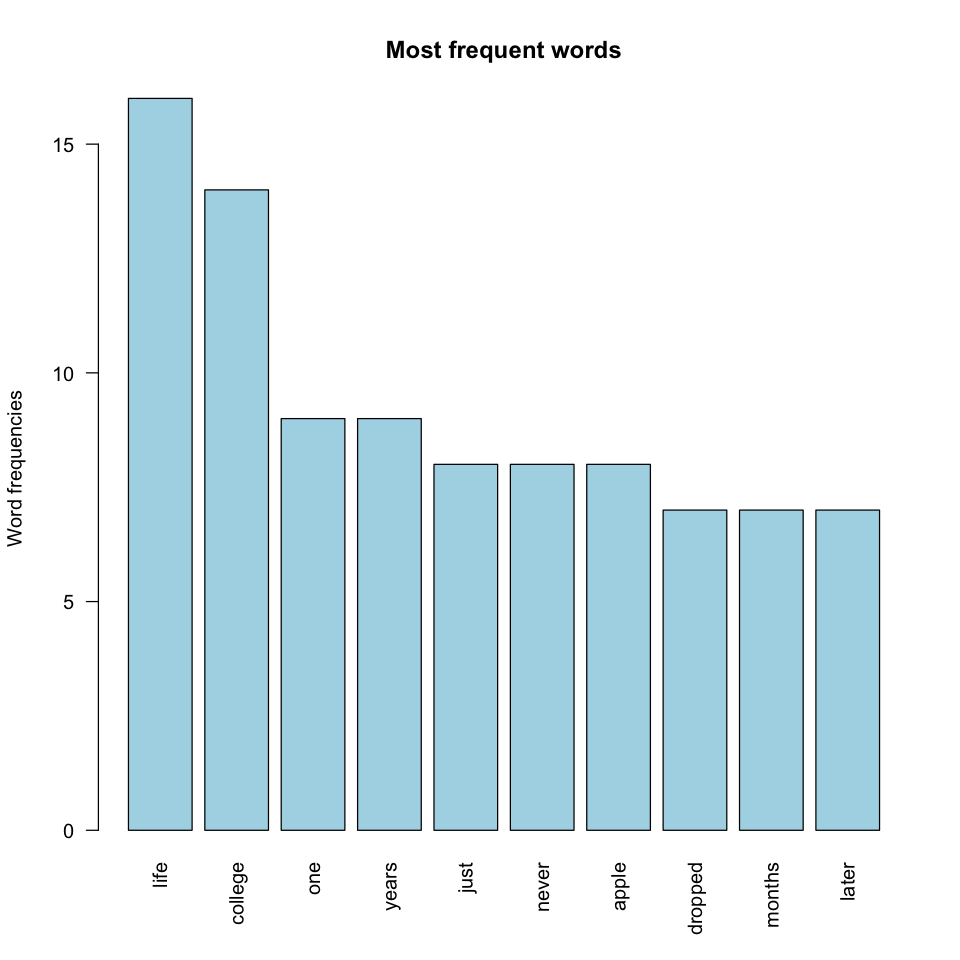

In [90]:
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,col ="lightblue", main ="Most frequent words", ylab = "Word frequencies")

### Task Two: 
1. Write a function that will take in a text file and produce a word cloud and word frequency plot.
2. Find song lyrics on the Internet, noting what they are and the source.
3. Using your function, produce a word cloud and a frequency plot for the lyrics.
4. Write a critical analysis of the word clouds produced by both the speech and the
song lyrics.

---

In [144]:
# Function to take in File & Output Wordcloud & Frequency Plot

analyseFileInput <- function(TextFile) {
    
    #Load File & Inspect
    songTranscript <- readLines(TextFile)
    songTranscript <- Corpus(VectorSource(songTranscript))
    #inspect(songTranscript)
    
    #Word Frequency Plot
    dtm <- TermDocumentMatrix(songTranscript)
    m <- as.matrix(dtm)
    v <- sort(rowSums(m),decreasing=TRUE)
    d <- data.frame(word = names(v),freq=v)
    head(d,5)
    
    #WordCloud
    set.seed(1234)
    wordcloud(words = d$word, freq = d$freq, min.freq = 1,max.words=100, random.order=FALSE, rot.per=0.35, colors=brewer.pal(8, "Dark2"))
    
}

In [145]:
# Get Song Lyrics as text file
# Artist: U2, Song: All I Want Is You
# Source: https://songmeanings.com/songs/view/36862/
inputFile = "./data/U2 - All I Want Is You.txt"

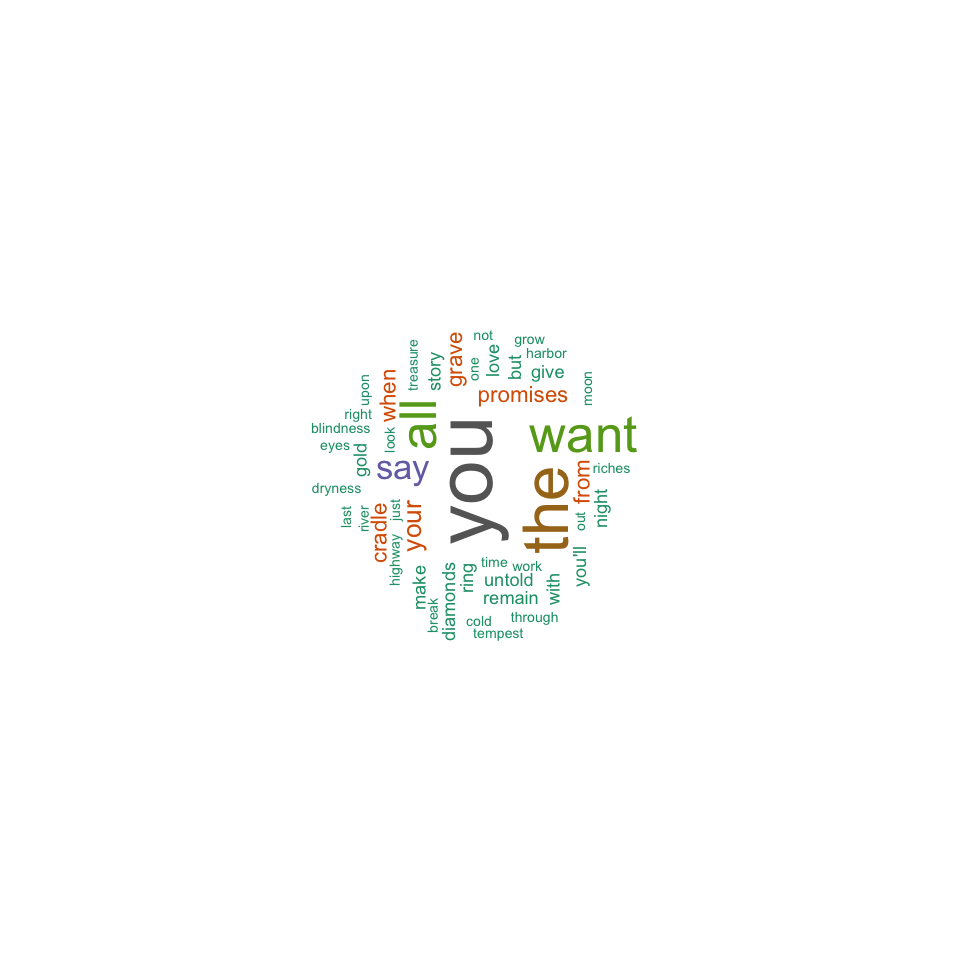

In [146]:
# Use my function with these parameterised lyrics
analyseFileInput(inputFile)

In [143]:
# Write a critical analysis of the word clouds produced by both the speech and the song lyrics

### Task Three:
1. Read back over the notes for week 6 - visualising text and state Zipf's Law in your own words.
2. How does your function address Zipf's Law? Discuss this in terms of the parameters you are not changing.
3. What are the challenges to this visualisation of text?
---

### Zipf's Law:

### Function Addresses Zipf's Law

### Challenges to Visualisation of Text